# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

# Data Validation
The dataset contains **4177 rows and 10 columns** with no missing values, and no duplicated data. I have validated all the columns against the criteria in the dataset table:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

After the data validation, the dataset contains **4177 rows and 10 columns.**

In [297]:
import pandas as pd
abalone = pd.read_csv('./data/abalone.csv')
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [298]:
abalone.isna().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

In [299]:
abalone.duplicated().sum()

0

In [300]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [301]:
abalone['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [302]:
abalone.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


# Exploratory Analysis
From Graph Distribution of numerical features, we can see that the distribution is not normal, so we can transform that using power transformation and log transformation to make normal distribution.

**From Investigating the relationship between target and categorical features**, we can see sex feature are good indicator for prediction.

**From Investigating the relationship between target and numerical features**, we can see there is multicollinearity between features, so we can use machine learning model that robust from that. And we can see that there is a nonlinear relationship between age and weight.

Finally, to enable model fitting, I have made the following changes:

- Remove rings feature. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics column because its not good indicator for prediction
- Transform numerical features
- Convert the categorical variables into numeric variables

## Normality Check

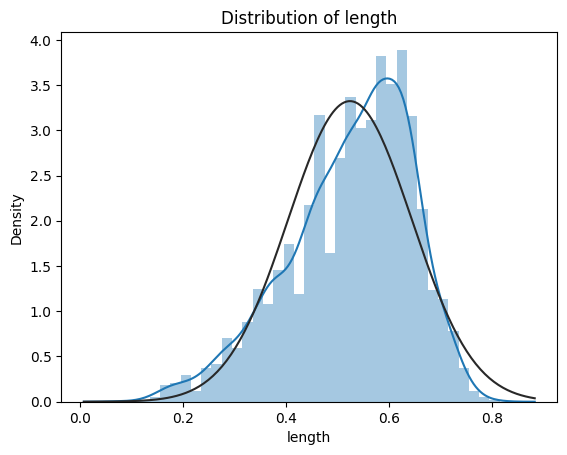

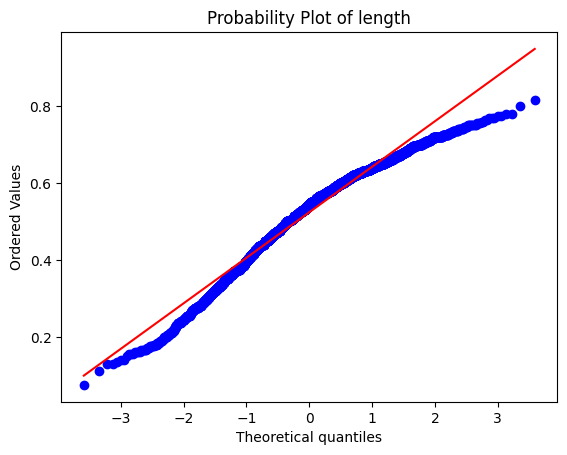

Skewness of length: -0.639873268981801
Kurtosis of length: 0.06462097389494126


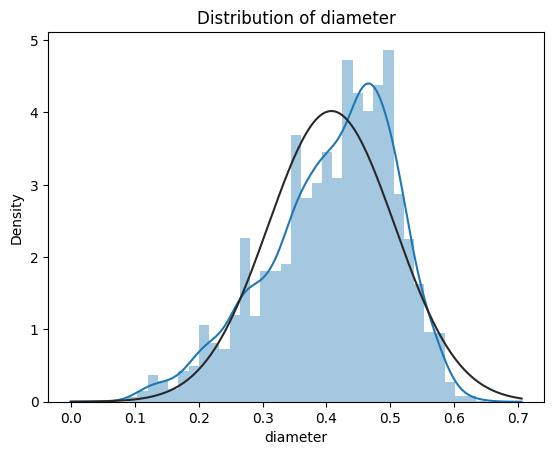

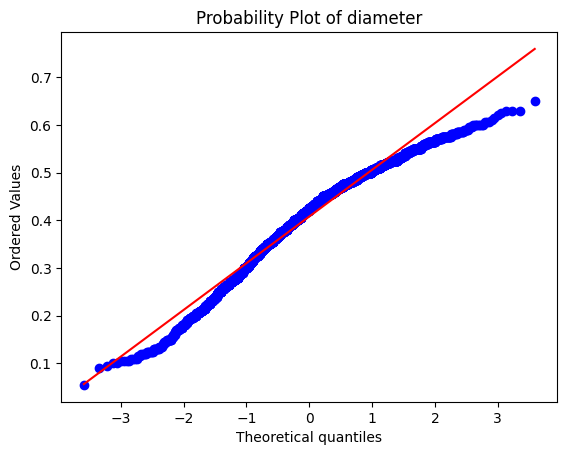

Skewness of diameter: -0.6091981423290918
Kurtosis of diameter: -0.04547558144299568


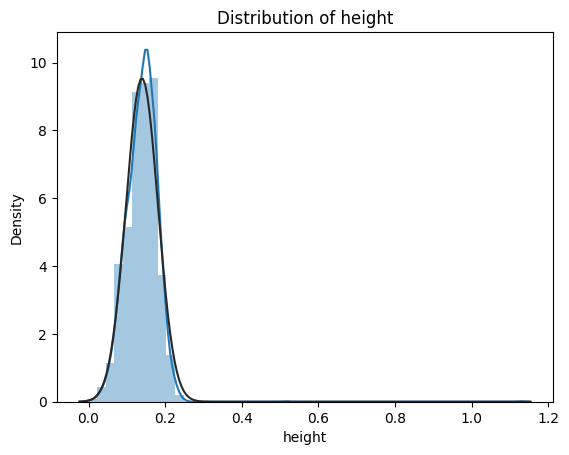

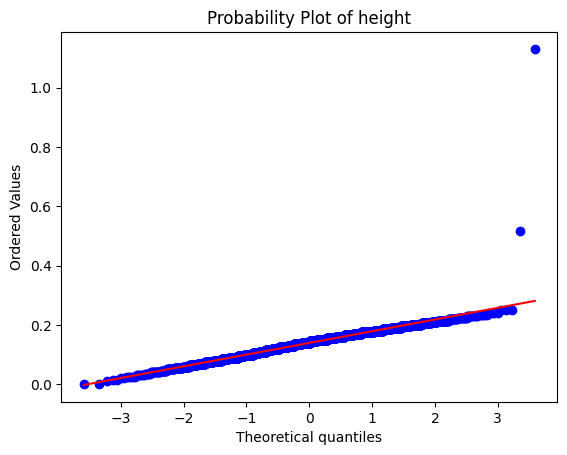

Skewness of height: 3.1288173790659615
Kurtosis of height: 76.02550922920125


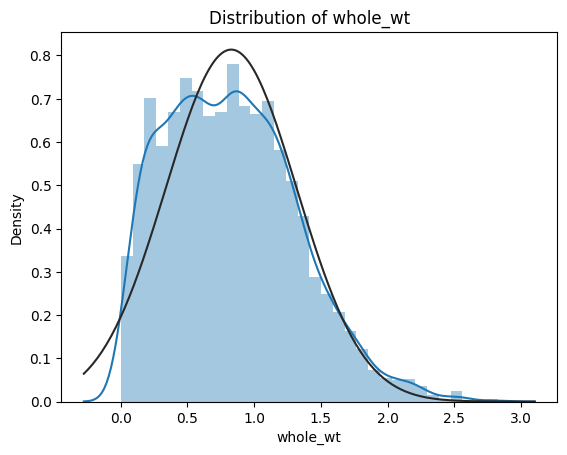

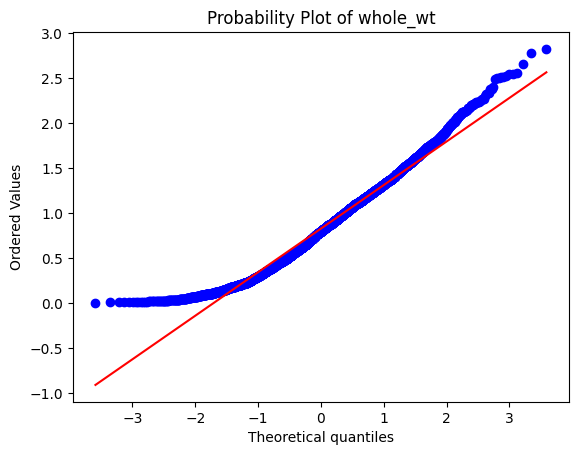

Skewness of whole_wt: 0.5309585632523087
Kurtosis of whole_wt: -0.02364350426998163


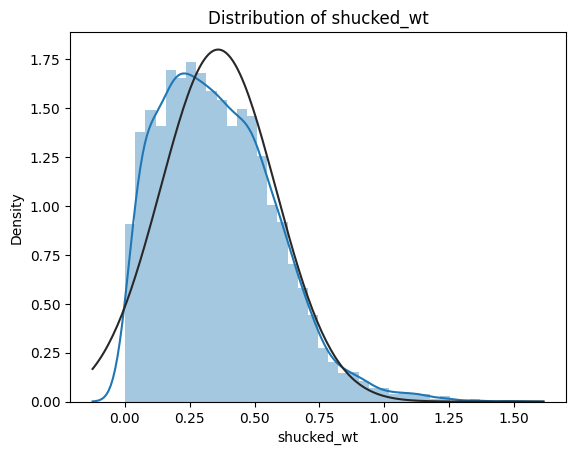

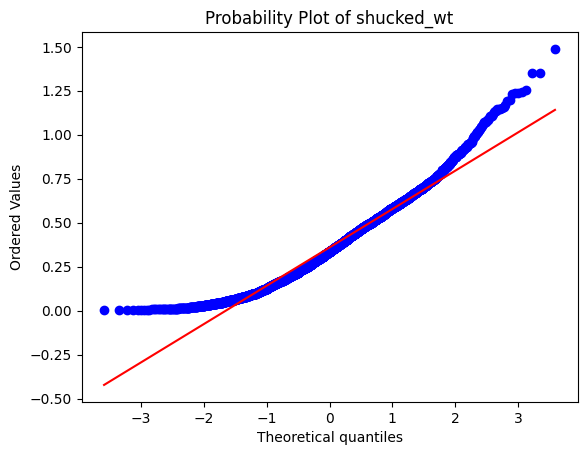

Skewness of shucked_wt: 0.7190979217612694
Kurtosis of shucked_wt: 0.5951236783694207


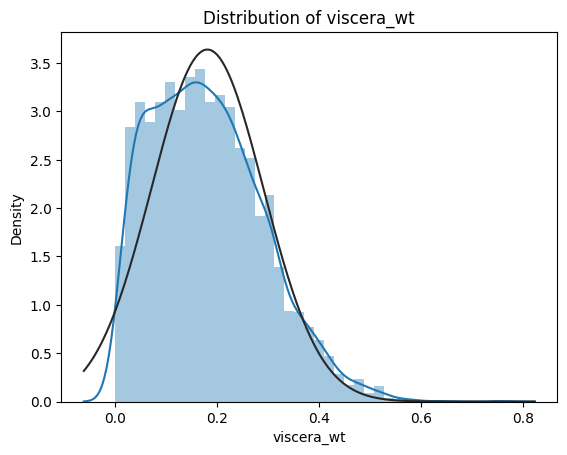

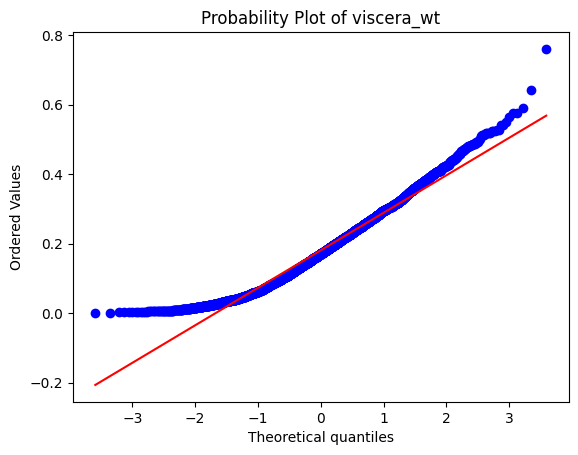

Skewness of viscera_wt: 0.5918521514155083
Kurtosis of viscera_wt: 0.08401174900221298


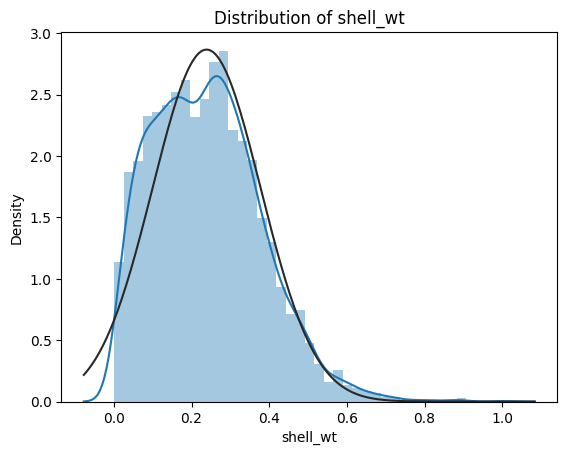

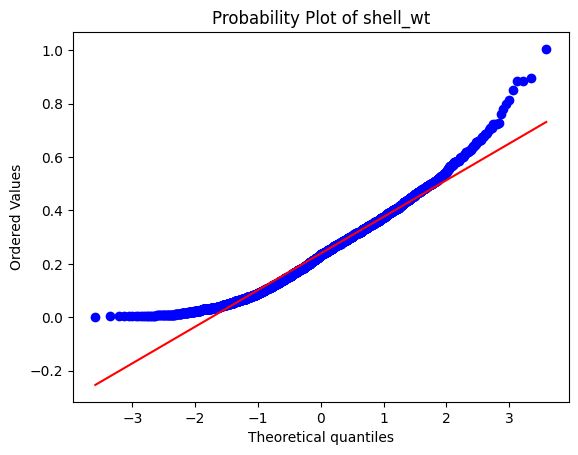

Skewness of shell_wt: 0.6209268251392077
Kurtosis of shell_wt: 0.531926126202173


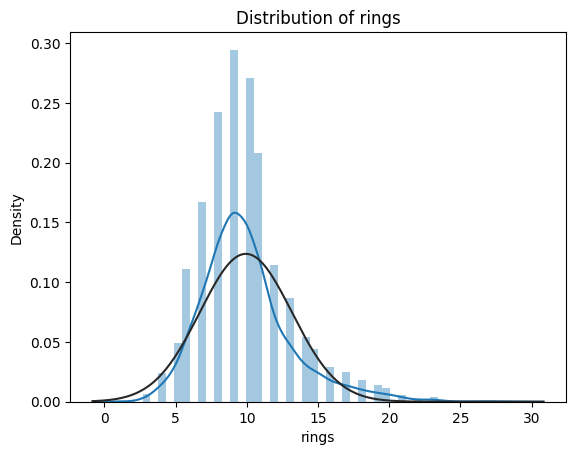

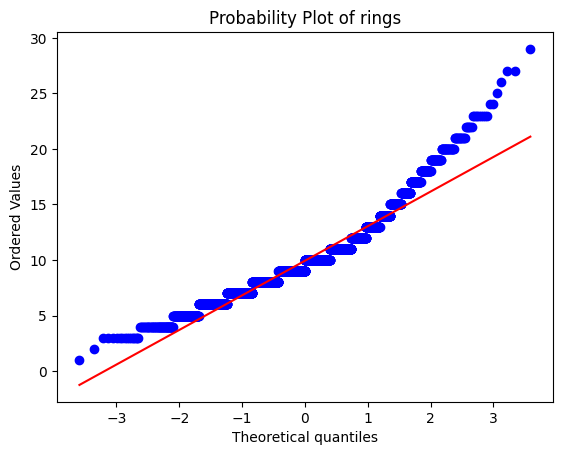

Skewness of rings: 1.114101898355677
Kurtosis of rings: 2.3306874268535847


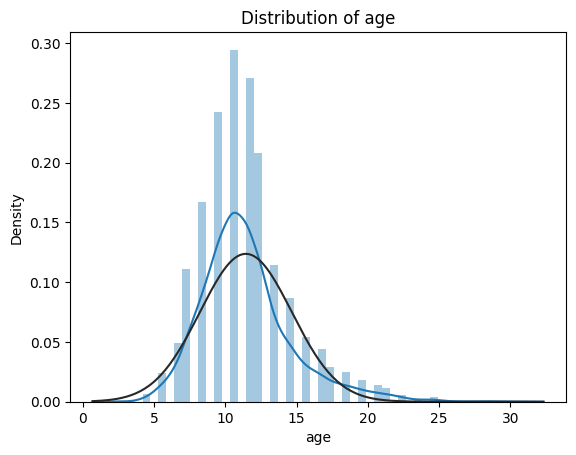

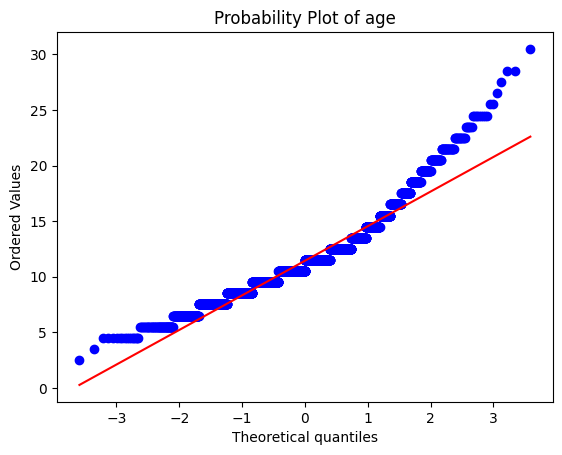

Skewness of age: 1.114101898355677
Kurtosis of age: 2.3306874268535847


In [303]:
from scipy.stats import norm
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def check_norm(data, col):
    # Plot distribution and probability of col variable
    sns.distplot(data[col], fit=norm).set(title = 'Distribution of {}'.format(col))
    fig = plt.figure()
    res = stats.probplot(data[col], plot = plt)
    plt.title(f'Probability Plot of {col}')
    plt.show()
    # Print skewness and kurtosis
    print(f'Skewness of {col}: {data[col].skew()}')
    print(f'Kurtosis of {col}: {data[col].kurt()}')

for num in abalone.describe().columns:
    check_norm(abalone, num)

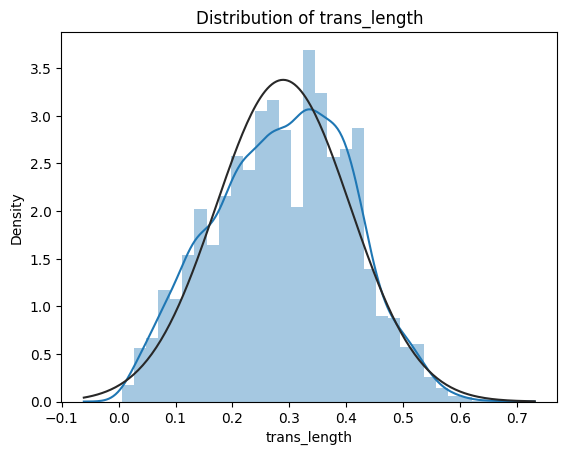

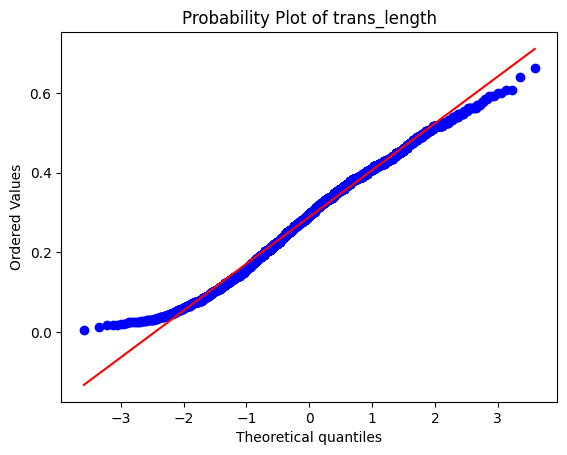

Skewness of trans_length: -0.06866038959852075
Kurtosis of trans_length: -0.5787070651291732


In [304]:
abalone['trans_length'] = (abalone['length']) ** 2
check_norm(abalone, 'trans_length')

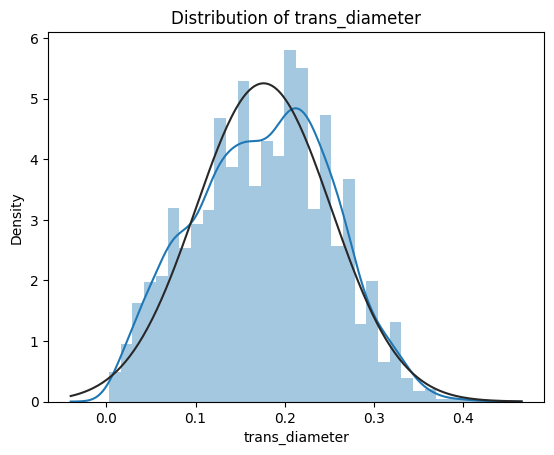

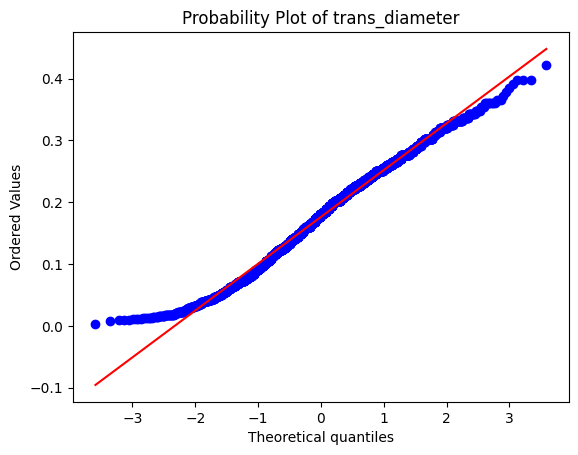

Skewness of trans_diameter: -0.026553709009649602
Kurtosis of trans_diameter: -0.6142036208741395


In [305]:
abalone['trans_diameter'] = abalone['diameter'] ** 2
check_norm(abalone, 'trans_diameter')

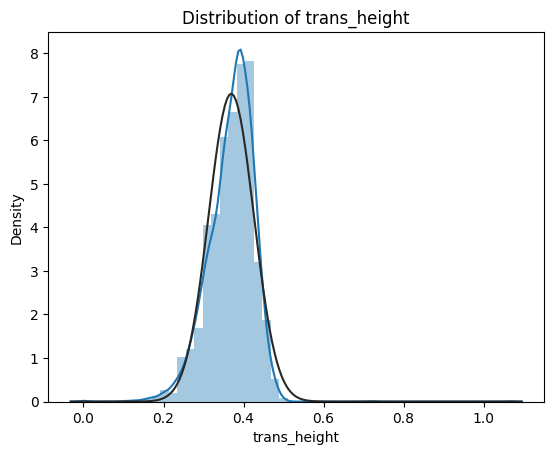

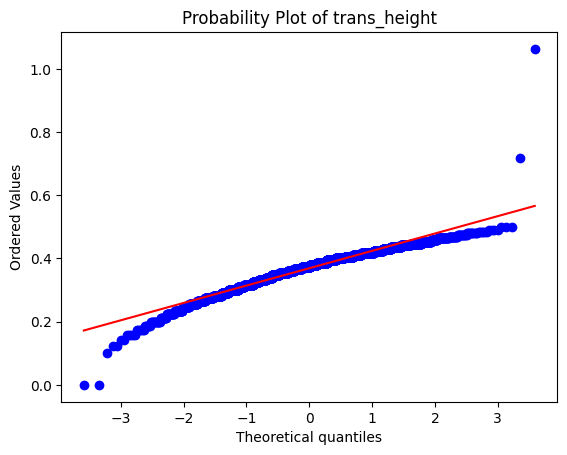

Skewness of trans_height: -0.29564050925436225
Kurtosis of trans_height: 6.991966204286252


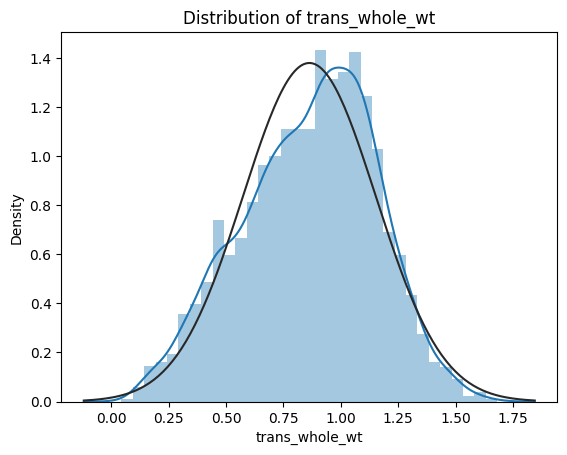

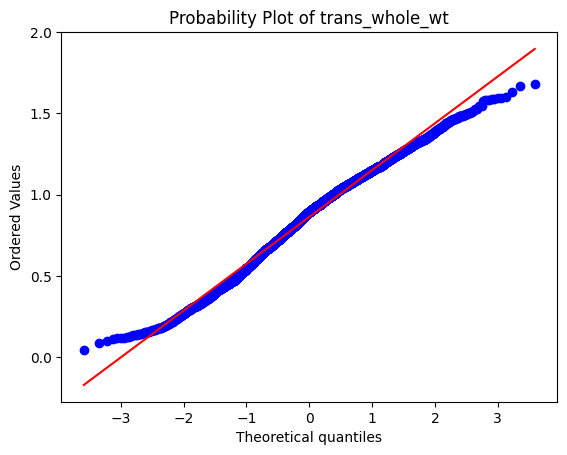

Skewness of trans_whole_wt: -0.2366462543916165
Kurtosis of trans_whole_wt: -0.4383949897697921


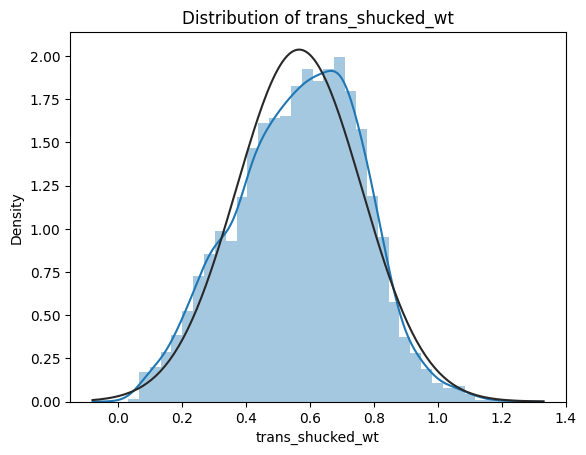

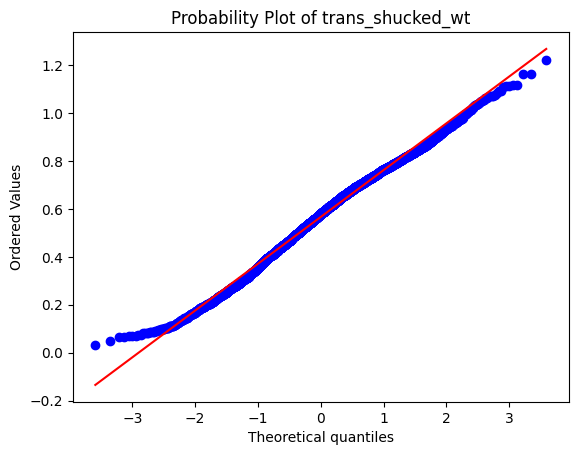

Skewness of trans_shucked_wt: -0.14144284204682617
Kurtosis of trans_shucked_wt: -0.3561812473170858


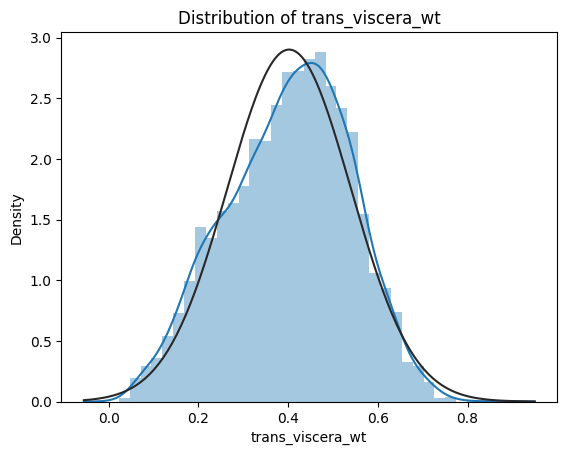

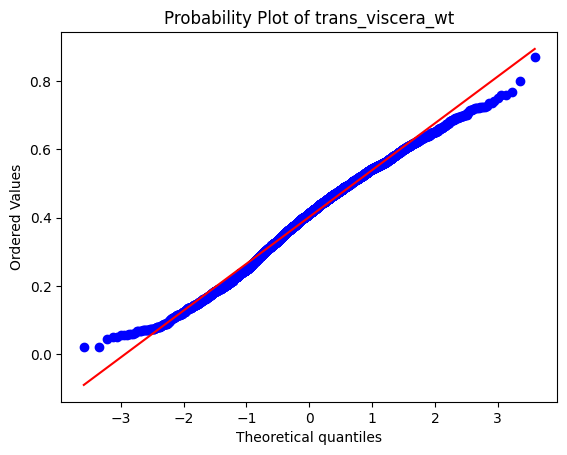

Skewness of trans_viscera_wt: -0.1833214290079523
Kurtosis of trans_viscera_wt: -0.4701873575544


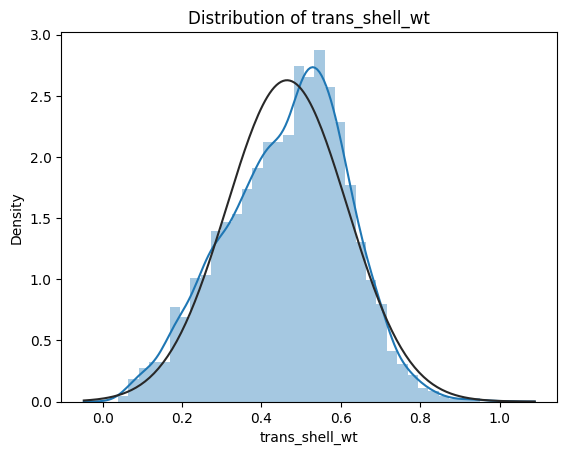

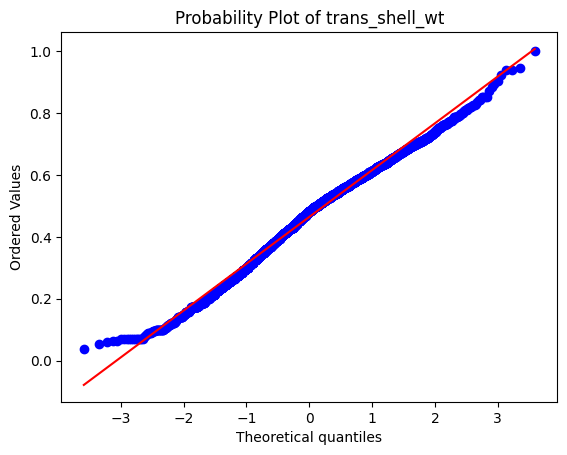

Skewness of trans_shell_wt: -0.22277230536113468
Kurtosis of trans_shell_wt: -0.29150164031349846


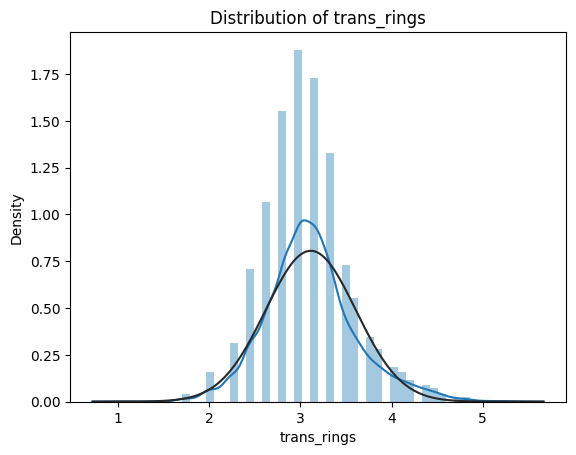

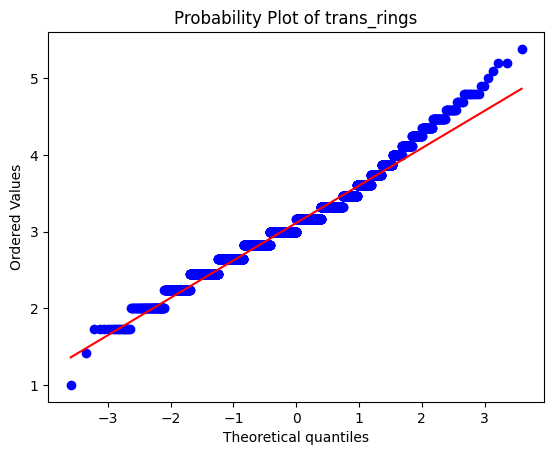

Skewness of trans_rings: 0.47136640262720086
Kurtosis of trans_rings: 1.0097251746344176


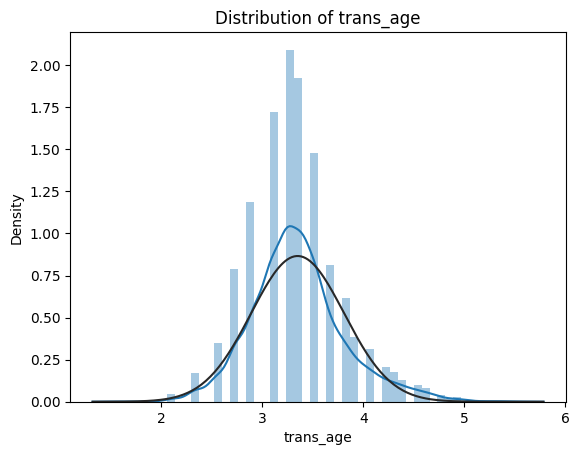

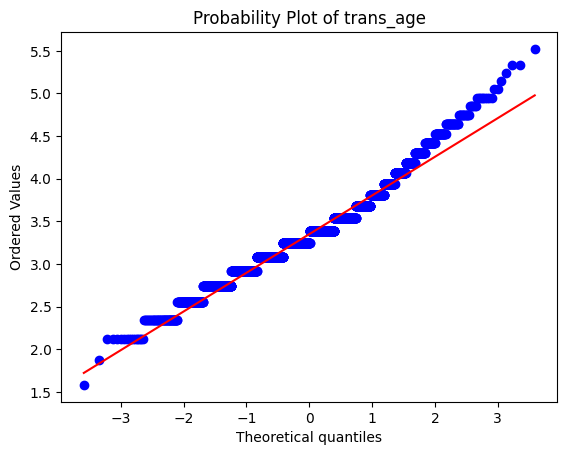

Skewness of trans_age: 0.5608731315323944
Kurtosis of trans_age: 1.065605264255975


In [306]:
for num in ['height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt', 'rings', 'age']:
	abalone['trans_'+num] = np.sqrt(abalone[num])
	check_norm(abalone, 'trans_'+num)

In [307]:
# Drop unnecessary columns
abalone_trans = abalone.drop(columns = ['length', 'diameter','height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt', 'rings', 'age'])

## Investigating the relationship between target and categorical features

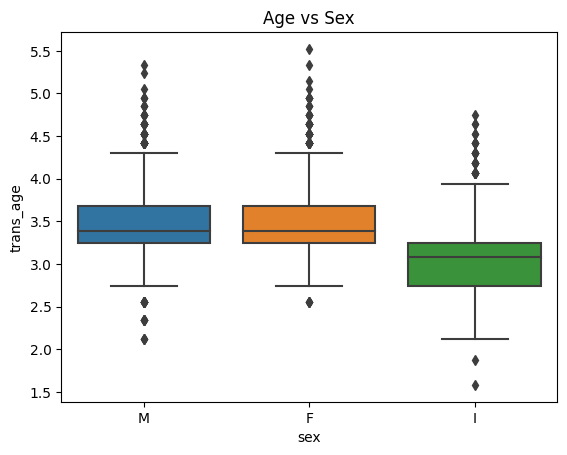

In [308]:
sns.boxplot(x = 'sex', y = 'trans_age', data = abalone_trans)
plt.title('Age vs Sex')
plt.show()

## Investigating the relationship between target and numerical features

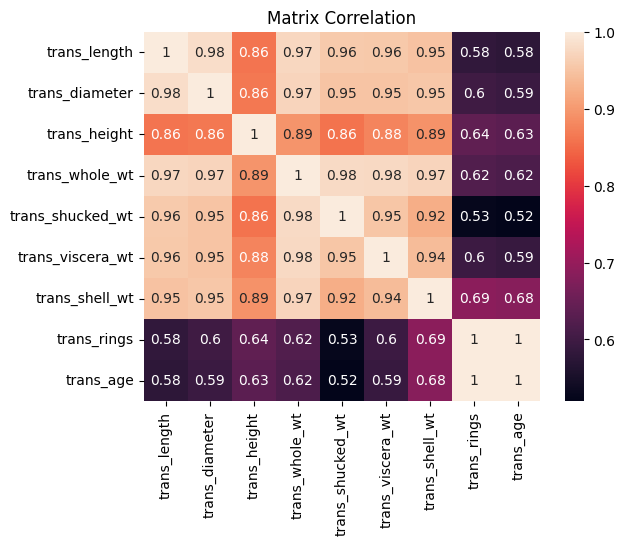

In [309]:
sns.heatmap(abalone_trans.corr(), annot = True)
plt.title('Matrix Correlation')
plt.show()

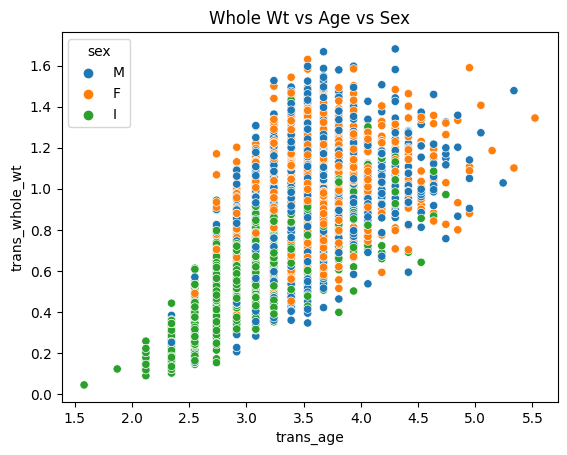

In [310]:
sns.scatterplot(x = 'trans_age', y = 'trans_whole_wt', hue = 'sex',data = abalone)
plt.title('Whole Wt vs Age vs Sex')
plt.show()

# Model Fitting
Predicting the age of abalone is regression problem in machine learning. I am choosing the **Decision Tree Regression** model as a baseline model because it is work with multicolinearity and interpretable. The comparison model I am choosing is the **Random Forest Regression model** because it works well with mixed data type and non-linear relationship.

In [311]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

features = abalone_trans.drop(columns = ['trans_rings', 'trans_age'])
X = pd.get_dummies(features, columns = ['sex'])
y = abalone_trans['trans_age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

scaler = RobustScaler()
x_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [312]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Model
dt = DecisionTreeRegressor(random_state = 21)
dt.fit(x_scaled, y_train)
y_pred_dt = dt.predict(x_test_scaled)

# Random Forest Model
rf = RandomForestRegressor(random_state = 21)
rf.fit(x_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)

# Model Evaluation
I am choosing **root mean squared error (rmse)** because the output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

The root mean squared error of Decision Tree Regression model and Random Forest Regression model is 0.417 and 0.302, meaning **Random Forest Regression model** predicts attendance rate with less error.

from this metric, we can conclude that the Random Forest Regression model has a predictive value close to the actual value.

In [313]:
from sklearn.metrics import mean_squared_error

rmse_dt = np.sqrt(mean_squared_error(y_pred_dt, y_test))
rmse_rf = np.sqrt(mean_squared_error(y_pred_rf, y_test))

print(f'Root Mean Squared Error of Decision Tree Regression: {round(rmse_dt,3)}')
print(f'Root Mean Squared Error of Random Forest Regression: {round(rmse_rf,3)}')

Root Mean Squared Error of Decision Tree Regression: 0.417
Root Mean Squared Error of Random Forest Regression: 0.302


From features importances, we can see **the weight of the dried shell and the weight of abalone meat** features are better predictors of age for abalones

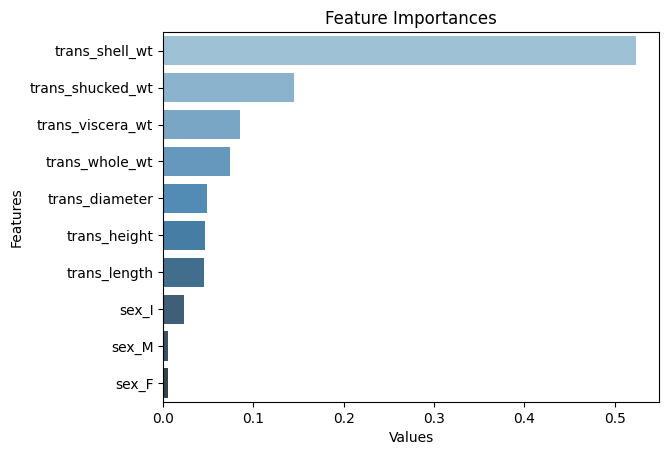

In [314]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort importances_rf by descending order
sorted_importances_rf = importances_rf.sort_values(ascending = False)

# Vizualize the feature importance with horizontal bar plot
sns.barplot(x = sorted_importances_rf.values, y = sorted_importances_rf.index, palette="Blues_d")
plt.title('Feature Importances')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()